# Desafio Proposto 

Sua missão será traduzir esta base de dados em informações que suportem o cálculo da 
Perda Esperada (PE), por meio das seguintes atividades
são, etc.

## Parte 1: Análise Exploratória de Dados (EDA) 

* Avalie a qualidade dos dados: valores faltantes, outliers, inconsistências.

* Analise a distribuição das variáveis principais (idade, renda, score, prazo, valor 
contratado).

* Identifique segmentos de maior risco, observando: 
    - o Distribuição de default por produto, região, score de crédito, renda, 
profissão, etc.

In [1]:
# Importação das bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais, para deixar a visualização das porcentagem melhor visualmente
pd.set_option('display.float_format', lambda x: f'%.2f' % x)
sns.set(style="whitegrid", palette="muted")

# Leitura da base
df = pd.read_csv('base_credito_simulada_10000_enriquecida.csv')

# Visualização inicial
df.head()

,id_operacao,id_cliente,produto,regiao,data_inicio,valor_contratado,prazo_meses,taxa_juros_aa,data_vencimento,atraso_max_dias,...,estado_civil,grau_instrucao,tempo_emprego,profissao,tipo_residencia,numero_dependentes,tem_cartao_credito,tem_outros_creditos,possui_veiculo,possui_imovel
0,O000001,C02275,Cheque Especial,Sudeste,2022-03-12 22:53:37.580839,3945.93,12,24.60,2023-03-12 22:53:37.580839,120,...,Viúvo,Superior,24.70,Autônomo,Outros,5,Sim,Sim,Sim,Sim
1,O000002,C02222,Cheque Especial,Sul,2019-02-15 15:28:15.883510,21265.68,12,21.92,2020-02-15 15:28:15.883510,0,...,Viúvo,Mestrado/Doutorado,21.40,Autônomo,Cedido,4,Sim,Sim,Não,Não
2,O000003,C01020,Crédito Pessoal,Sul,2020-05-16 22:17:02.920443,33352.04,24,13.37,2022-05-16 22:17:02.920443,60,...,Solteiro,Mestrado/Doutorado,28.60,Analista,Financiada,2,Não,Sim,Sim,Sim
3,O000004,C01158,Financiamento Auto,Norte,2020-02-12 08:37:49.191306,745.96,36,23.10,2023-02-12 08:37:49.191306,0,...,União Estável,Pós-graduação,17.40,Autônomo,Cedido,3,Sim,Não,Sim,Sim
4,O000005,C01650,Crédito Pessoal,Nordeste,2022-09-06 01:26:21.049381,24707.13,12,6.95,2023-09-06 01:26:21.049381,15,...,Solteiro,Fundamental,19.30,Aposentado,Financiada,5,Não,Sim,Não,Não


## Avaliação da Qualidade dos Dados

In [2]:
# Informações gerais da base
df.info()

# Verificar valores ausentes
valores_nulos = df.isnull().sum()
print("Valores ausentes por coluna:")
print(valores_nulos[valores_nulos > 0])

# Estatísticas básicas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_operacao          10000 non-null  object 
 1   id_cliente           10000 non-null  object 
 2   produto              10000 non-null  object 
 3   regiao               10000 non-null  object 
 4   data_inicio          10000 non-null  object 
 5   valor_contratado     10000 non-null  float64
 6   prazo_meses          10000 non-null  int64  
 7   taxa_juros_aa        10000 non-null  float64
 8   data_vencimento      10000 non-null  object 
 9   atraso_max_dias      10000 non-null  int64  
 10  default              10000 non-null  int64  
 11  ead                  10000 non-null  float64
 12  perda_real           10000 non-null  float64
 13  lgd                  10000 non-null  float64
 14  renda_cliente        10000 non-null  float64
 15  idade_cliente        10000 non-null  

,valor_contratado,prazo_meses,taxa_juros_aa,atraso_max_dias,default,ead,perda_real,lgd,renda_cliente,idade_cliente,score_credito,tempo_emprego,numero_dependentes
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,25467.14,35.83,15.00,37.58,0.19,3725.27,2418.65,0.13,10862.99,45.97,570.81,15.04,2.55
std,14387.52,17.10,5.77,63.42,0.40,9137.57,6231.43,0.27,5358.40,16.41,158.87,8.57,1.70
min,502.35,12.00,5.00,0.00,0.00,0.00,0.00,0.00,1500.22,18.00,300.00,0.00,0.00
25%,13094.82,24.00,10.05,0.00,0.00,0.00,0.00,0.00,6271.13,32.00,432.00,7.70,1.00
50%,25273.96,36.00,14.89,15.00,0.00,0.00,0.00,0.00,10984.23,45.00,567.00,15.10,3.00
75%,38215.09,48.00,19.95,60.00,0.00,0.00,0.00,0.00,15564.22,60.00,711.00,22.30,4.00
max,49994.80,60.00,25.00,360.00,1.00,48720.77,43802.79,1.00,19994.78,74.00,850.00,30.00,5.00


## Distribuição das Variaveis

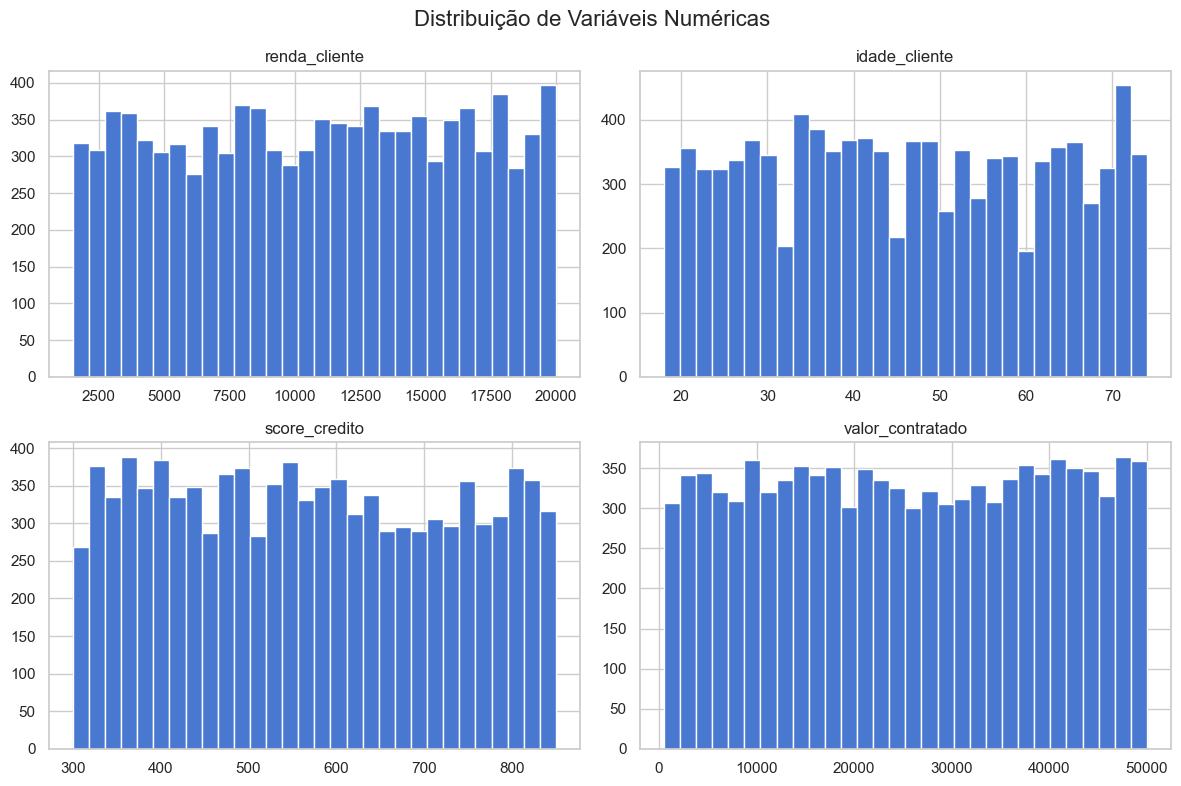

In [3]:
variaveis_numericas = ['renda_cliente', 'idade_cliente', 'score_credito', 'valor_contratado']
df[variaveis_numericas].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribuição de Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

# Análise de Default por Segmentos
### Taxa de default geral

In [4]:
taxa_geral= df['default'].mean() * 100
print(f"Taxa geral de inadimplência(default): {taxa_geral:.2f}%")


Taxa geral de inadimplência(default): 19.41%


### Analisando os segmentos de maiores risco conforme a taxa de default, criei os graficos para ficar visualmente mais facil de analisar e indentificar os seguimentos de maiores riscos


Inadimplência por Produto (%):
🟥 Cheque Especial: 20.01% (ACIMA da média de 19.41%)
🟨 Consignado: 19.75% (Próximo da média)
🟨 Cartão de Crédito: 19.62% (Próximo da média)
🟨 Financiamento Auto: 19.00% (Próximo da média)
🟩 Crédito Pessoal: 18.70% (Abaixo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


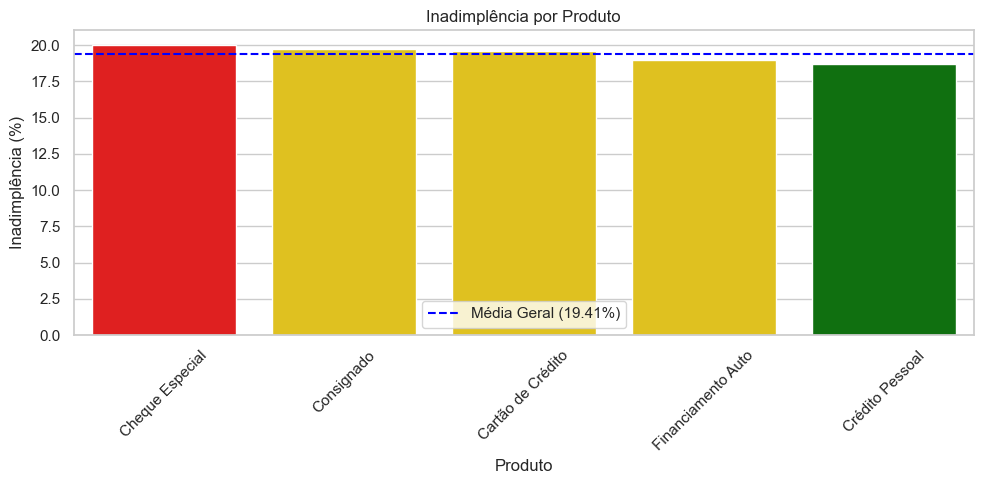


Inadimplência por Região (%):
🟥 Sul: 19.94% (ACIMA da média de 19.41%)
🟨 Norte: 19.57% (Próximo da média)
🟨 Centro-Oeste: 19.26% (Próximo da média)
🟨 Nordeste: 19.23% (Próximo da média)
🟨 Sudeste: 19.06% (Próximo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


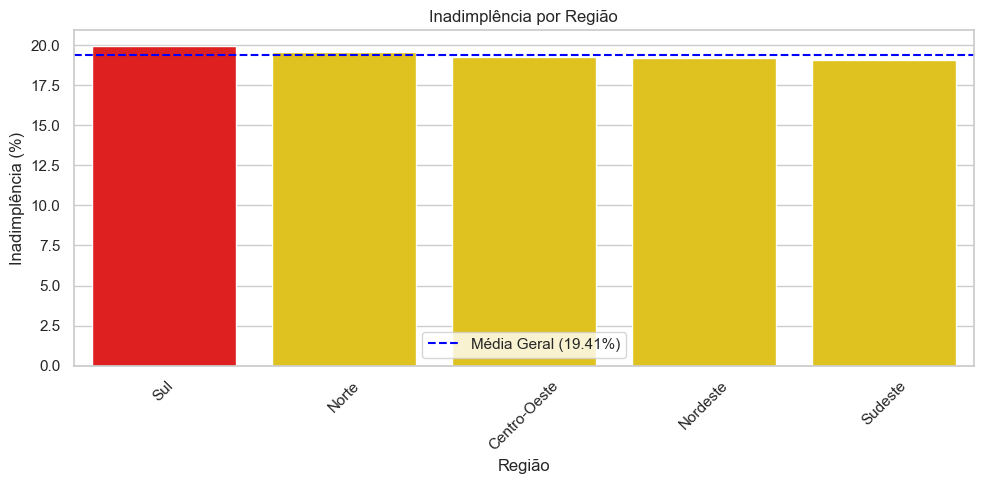


Inadimplência por Faixa de Score (%):
🟨 Médio: 19.52% (Próximo da média)
🟨 Baixo: 19.45% (Próximo da média)
🟨 Alto: 19.28% (Próximo da média)
🟩 Muito Baixo: 6.25% (Abaixo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


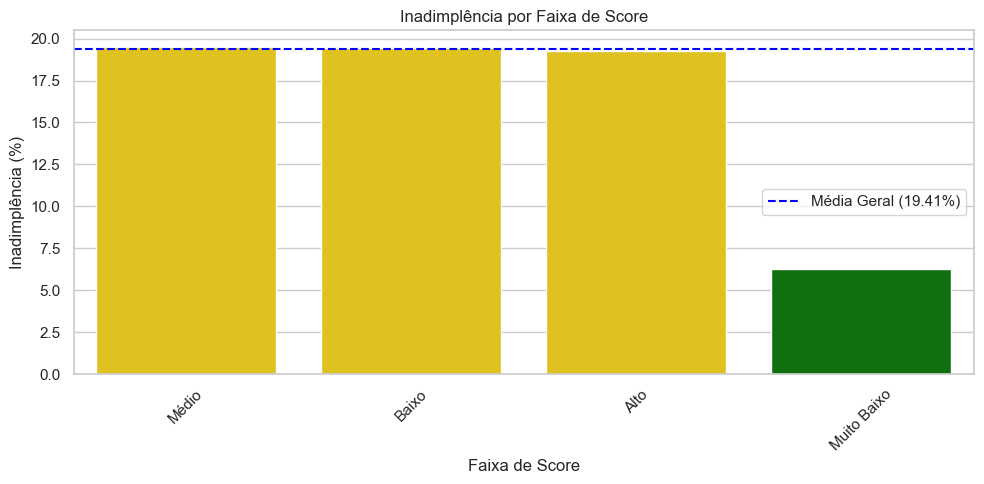


Inadimplência por Faixa de Renda (%):
🟨 Alta: 19.82% (Próximo da média)
🟨 Baixa: 19.48% (Próximo da média)
🟨 Média-Alta: 19.30% (Próximo da média)
🟨 Média-Baixa: 19.04% (Próximo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


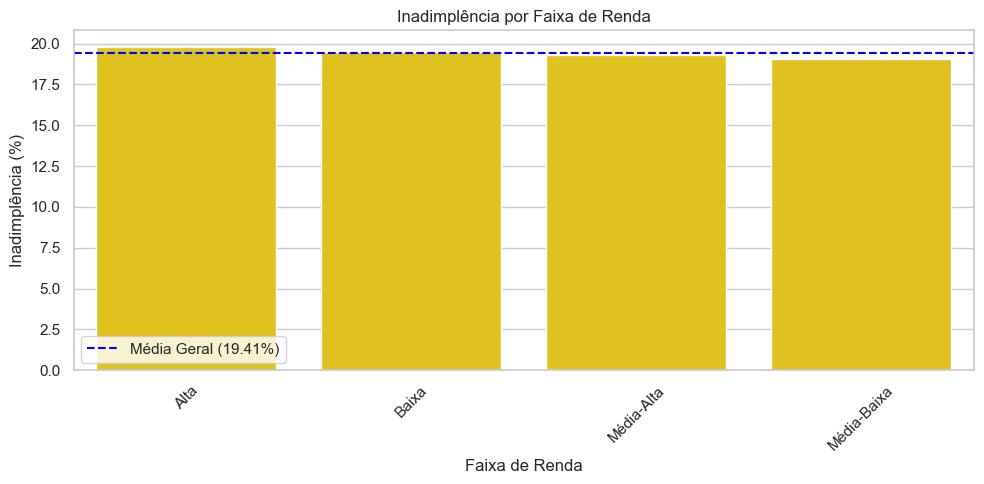


Inadimplência por Faixa de Idade (%):
🟥 Até 25: 20.62% (ACIMA da média de 19.41%)
🟨 36–50: 19.76% (Próximo da média)
🟨 51–65: 19.06% (Próximo da média)
🟨 65+: 19.04% (Próximo da média)
🟩 26–35: 18.82% (Abaixo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


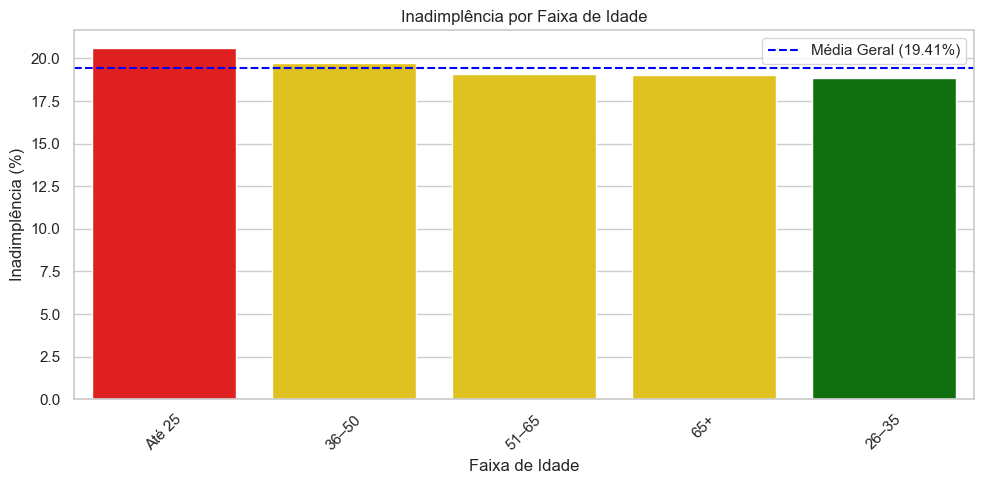


Inadimplência por Tempo de Emprego (%):
🟥 Até 2: 20.90% (ACIMA da média de 19.41%)
🟥 6–10: 20.38% (ACIMA da média de 19.41%)
🟨 11–20: 19.44% (Próximo da média)
🟨 20+: 18.99% (Próximo da média)
🟩 3–5: 18.19% (Abaixo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


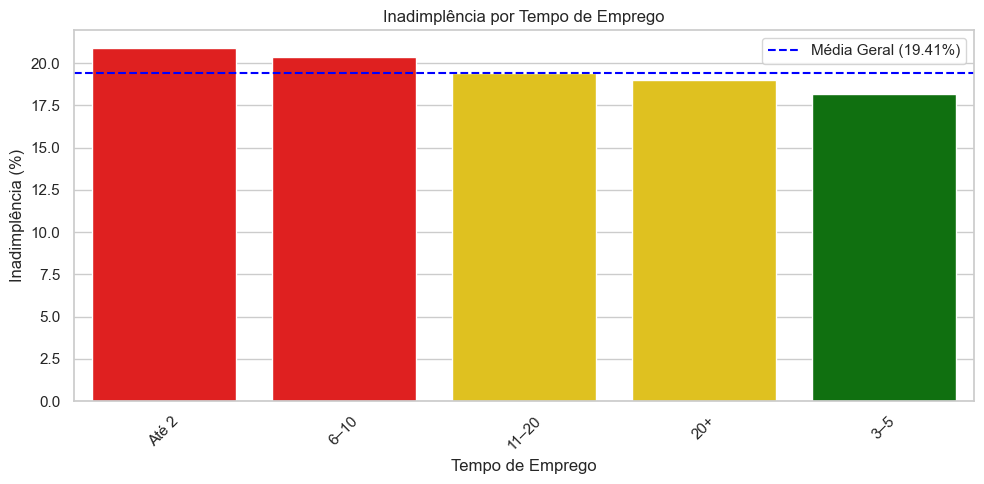


Inadimplência por Quantidade de Dependentes (%):
🟨 3–4: 19.81% (Próximo da média)
🟨 1–2: 19.66% (Próximo da média)
🟨 5+: 19.38% (Próximo da média)
🟩 0: 18.03% (Abaixo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


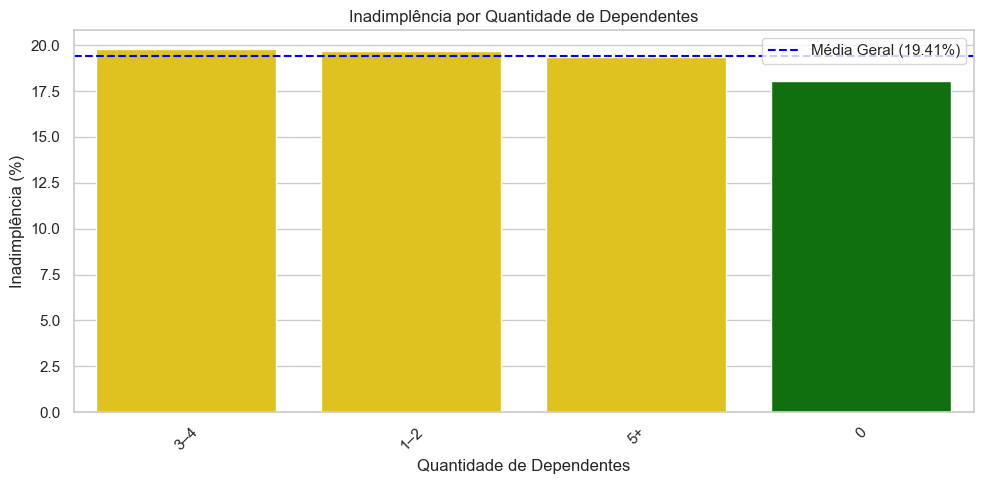


Inadimplência por Profissão (%):
🟥 Gerente: 21.07% (ACIMA da média de 19.41%)
🟨 Analista: 19.73% (Próximo da média)
🟨 Vendedor: 19.73% (Próximo da média)
🟨 Autônomo: 19.70% (Próximo da média)
🟨 Estudante: 19.35% (Próximo da média)
🟨 Engenheiro: 19.07% (Próximo da média)
🟩 Aposentado: 18.66% (Abaixo da média)
🟩 Professor: 18.13% (Abaixo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


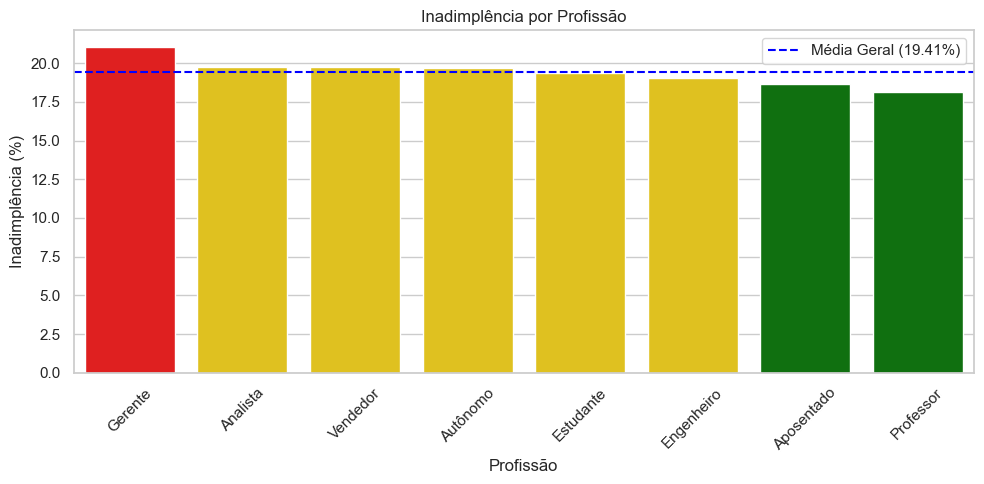


Inadimplência por Estado Civil (%):
🟥 Divorciado: 20.53% (ACIMA da média de 19.41%)
🟨 Casado: 19.78% (Próximo da média)
🟨 Viúvo: 19.17% (Próximo da média)
🟨 União Estável: 19.13% (Próximo da média)
🟩 Solteiro: 18.45% (Abaixo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


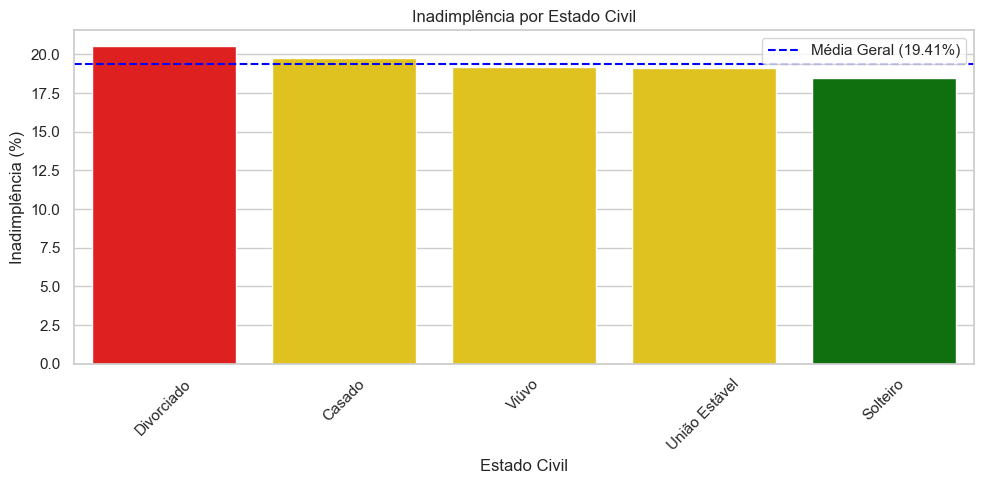


Inadimplência por Escolaridade (%):
🟥 Pós-graduação: 20.32% (ACIMA da média de 19.41%)
🟥 Superior: 20.29% (ACIMA da média de 19.41%)
🟥 Fundamental: 20.09% (ACIMA da média de 19.41%)
🟩 Mestrado/Doutorado: 18.50% (Abaixo da média)
🟩 Médio: 17.94% (Abaixo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


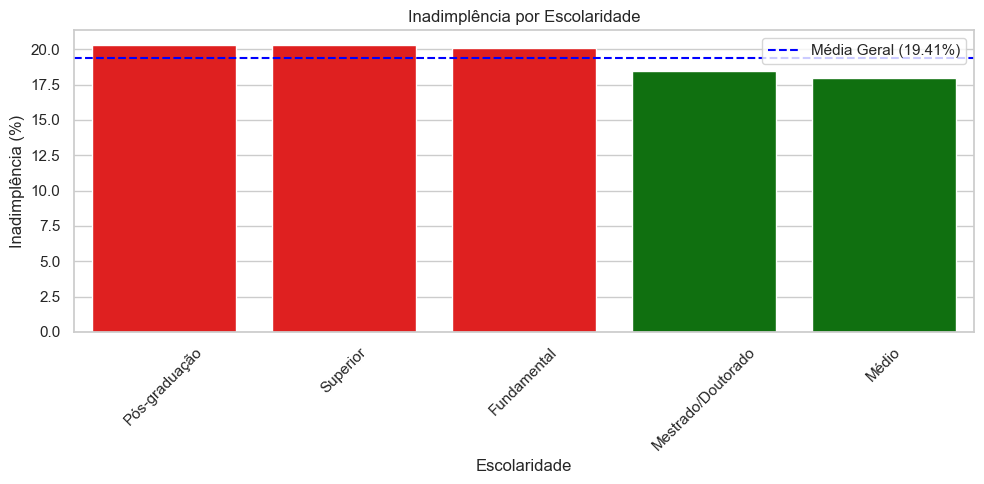


Inadimplência por Tipo de Residência (%):
🟥 Cedido: 20.35% (ACIMA da média de 19.41%)
🟥 Própria: 19.99% (ACIMA da média de 19.41%)
🟨 Outros: 19.26% (Próximo da média)
🟨 Financiada: 19.09% (Próximo da média)
🟩 Alugada: 18.26% (Abaixo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


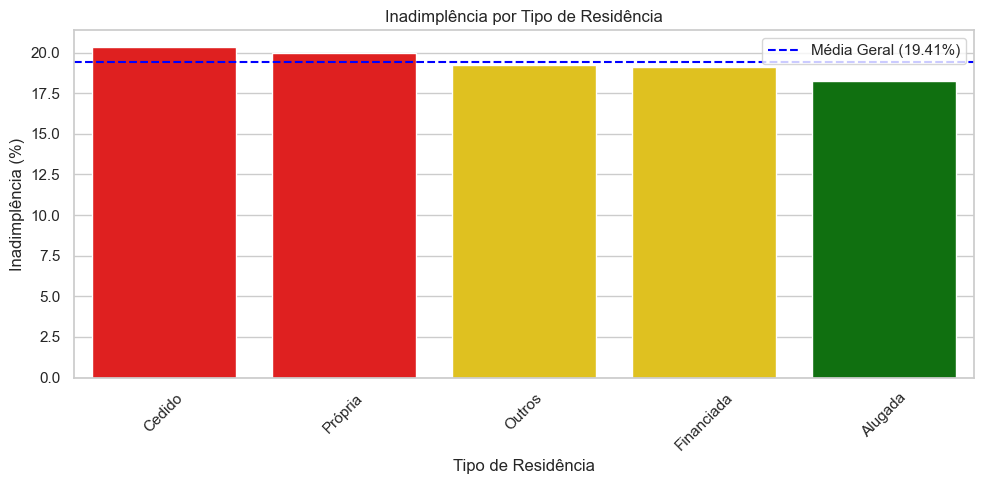


Inadimplência por Cartão de Crédito (%):
🟨 Sim: 19.63% (Próximo da média)
🟩 Não: 18.55% (Abaixo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


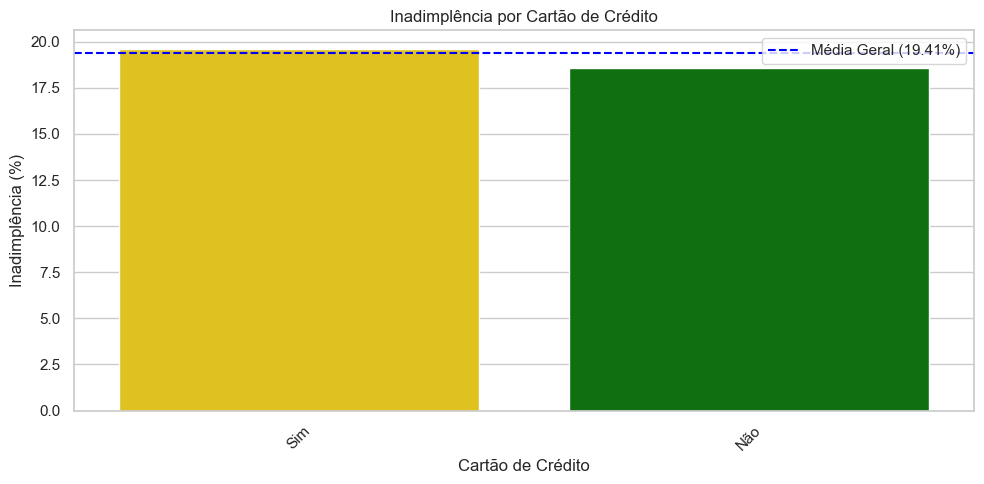


Inadimplência por Outros Créditos (%):
🟨 Sim: 19.82% (Próximo da média)
🟨 Não: 19.01% (Próximo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


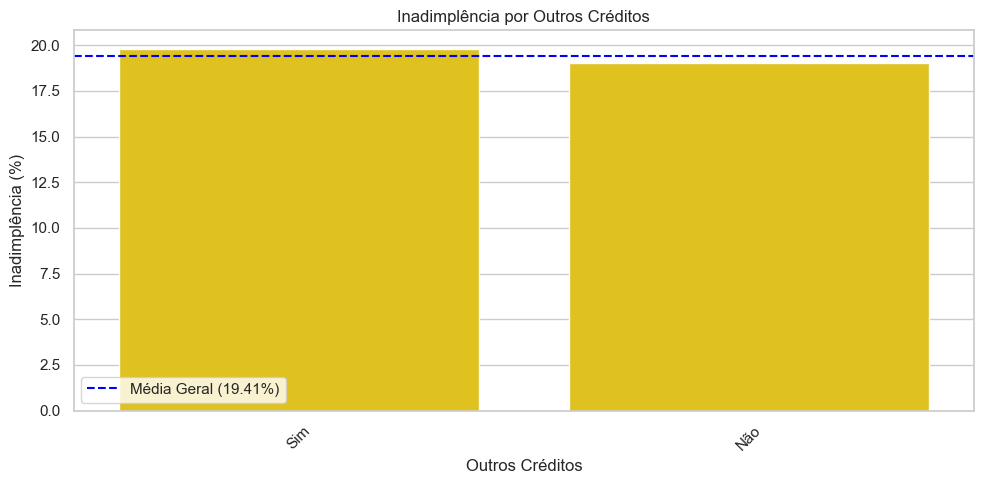


Inadimplência por Possui Veículo (%):
🟨 Não: 19.46% (Próximo da média)
🟨 Sim: 19.37% (Próximo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


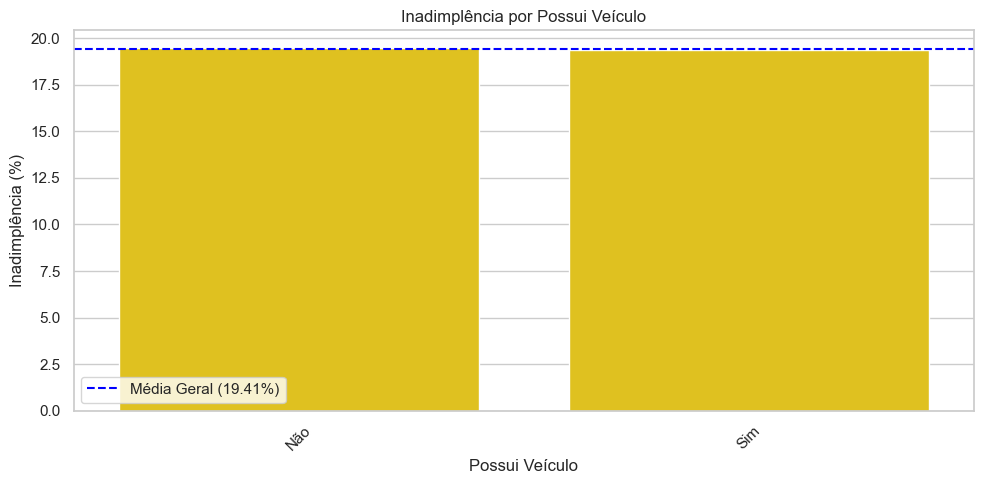


Inadimplência por Possui Imóvel (%):
🟥 Sim: 20.68% (ACIMA da média de 19.41%)
🟩 Não: 18.52% (Abaixo da média)


C:\Users\fabia\AppData\Local\Temp\ipykernel_18060\2747390875.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)


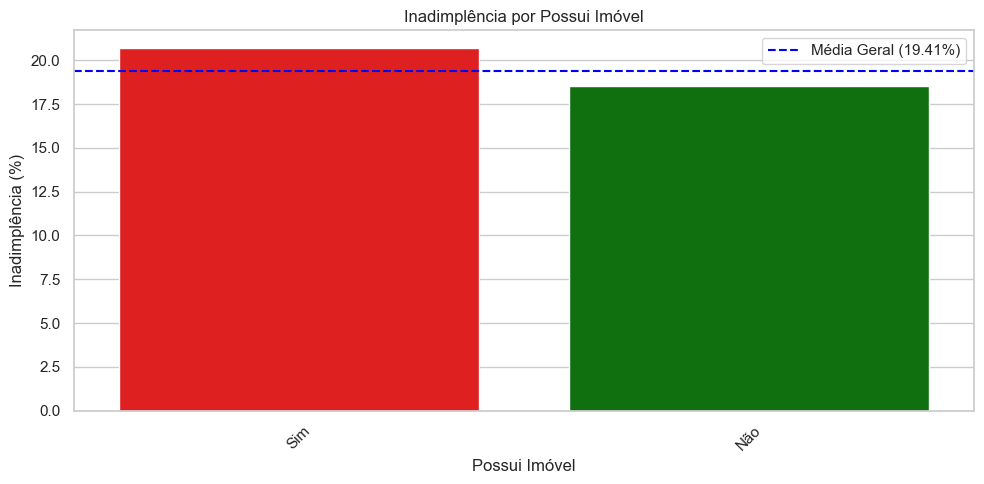

In [5]:
# Criando as faixas
df['faixa_score'] = pd.cut(df['score_credito'], bins=[0, 300, 500, 700, 900], labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto'])
df['faixa_renda'] = pd.qcut(df['renda_cliente'], q=4, labels=['Baixa', 'Média-Baixa', 'Média-Alta', 'Alta'])
df['faixa_idade'] = pd.cut(df['idade_cliente'], bins=[0, 25, 35, 50, 65, 100], labels=['Até 25', '26–35', '36–50', '51–65', '65+'])
df['faixa_tempo_emprego'] = pd.cut(df['tempo_emprego'], bins=[0, 2, 5, 10, 20, 50], labels=['Até 2', '3–5', '6–10', '11–20', '20+'])
df['faixa_dependentes'] = pd.cut(df['numero_dependentes'], bins=[-1, 0, 2, 4, 10], labels=['0', '1–2', '3–4', '5+'])

# Dicionário com os segmentos de risco
segmentos = {
    'Produto': 'produto',
    'Região': 'regiao',
    'Faixa de Score': 'faixa_score',
    'Faixa de Renda': 'faixa_renda',
    'Faixa de Idade': 'faixa_idade',
    'Tempo de Emprego': 'faixa_tempo_emprego',
    'Quantidade de Dependentes': 'faixa_dependentes',
    'Profissão': 'profissao',
    'Estado Civil': 'estado_civil',
    'Escolaridade': 'grau_instrucao',
    'Tipo de Residência': 'tipo_residencia',
    'Cartão de Crédito': 'tem_cartao_credito',
    'Outros Créditos': 'tem_outros_creditos',
    'Possui Veículo': 'possui_veiculo',
    'Possui Imóvel': 'possui_imovel'
}

# Loop para gerar análise + gráfico para cada segmento
for titulo, coluna in segmentos.items():
    inadimplencia = df.groupby(coluna, observed=True)['default'].mean().sort_values(ascending=False) * 100
    print(f"\nInadimplência por {titulo} (%):")
    cores = []

    for categoria, taxa in inadimplencia.items():
        if taxa > taxa_geral + 0.5:
            cores.append('red')
            print(f"🟥 {categoria}: {taxa:.2f}% (ACIMA da média de {taxa_geral:.2f}%)")
        elif taxa < taxa_geral - 0.5:
            cores.append('green')
            print(f"🟩 {categoria}: {taxa:.2f}% (Abaixo da média)")
        else:
            cores.append('gold')
            print(f"🟨 {categoria}: {taxa:.2f}% (Próximo da média)")

    # Gráfico
    plt.figure(figsize=(10, 5))
    sns.barplot(x=inadimplencia.index.astype(str), y=inadimplencia.values, palette=cores)
    plt.axhline(taxa_geral, color='blue', linestyle='--', label=f'Média Geral ({taxa_geral:.2f}%)')
    plt.title(f'Inadimplência por {titulo}')
    plt.ylabel('Inadimplência (%)')
    plt.xlabel(titulo)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

## Um dos gráficos a se antentar é o de score que a faixa de score muito baixo deu uma média bem abaixo do normal, o que aparentemente não é normal

### Possivies erros ou causa disso:
- Score gerado de forma aleatória no dataset simulado;

- Talvez clientes com score muito baixo só recebem crédito se tiverem renda alta, bens, imoveis e etc...

- Amostra pequena de clientes com score muito baixo e, poucos defaults.

# Parte 2
- Como alguns graficos já foram criados acima para facilitar a vizualização e entendimento tanto meu como de quem vai ler esse arquivo pois pensei em talvez uma pessoa não técnica ler e compreender, agora vou seguir com logicas mais simplificadas

In [6]:
# Critério de default já está presente: 1 = atraso >= 90 dias
taxa_pd_geral = df['default'].mean() * 100
print(f" Probabilidade geral de default (PD): {taxa_pd_geral:.2f}%")


 Probabilidade geral de default (PD): 19.41%


In [7]:
# Criação das probabilidades de default por diferentes segmentos

# PD por Faixa de Score
taxa_pd_score = df.groupby('faixa_score', observed=True)['default'].mean()
df['pd_score'] = df['faixa_score'].map(taxa_pd_score)

# PD por Produto
taxa_pd_produto = df.groupby('produto', observed=True)['default'].mean()
df['pd_produto'] = df['produto'].map(taxa_pd_produto)

# PD por Região
taxa_pd_regiao = df.groupby('regiao', observed=True)['default'].mean()
df['pd_regiao'] = df['regiao'].map(taxa_pd_regiao)

# PD por Faixa de Renda
taxa_pd_renda = df.groupby('faixa_renda', observed=True)['default'].mean()
df['pd_renda'] = df['faixa_renda'].map(taxa_pd_renda)

# PD por Profissão
taxa_pd_profissao = df.groupby('profissao', observed=True)['default'].mean()
df['pd_profissao'] = df['profissao'].map(taxa_pd_profissao)


### vizualização dos pds e sguimentos

In [8]:

# Essas faixas já foram criadas anteriormente:
segmentos_pd = {
    'Faixa de Score': 'faixa_score',
    'Produto': 'produto',
    'Região': 'regiao',
    'Faixa de Renda': 'faixa_renda',
    'Profissão': 'profissao'
}

for nome, coluna in segmentos_pd.items():
    print(f"\n PD por {nome}:")
    pd_por_segmento = df.groupby(coluna, observed=True)['default'].mean().sort_values(ascending=False) * 100
    print(pd_por_segmento.round(2))



 PD por Faixa de Score:
faixa_score
Médio         19.52
Baixo         19.45
Alto          19.28
Muito Baixo    6.25
Name: default, dtype: float64

 PD por Produto:
produto
Cheque Especial      20.01
Consignado           19.75
Cartão de Crédito    19.62
Financiamento Auto   19.00
Crédito Pessoal      18.70
Name: default, dtype: float64

 PD por Região:
regiao
Sul            19.94
Norte          19.57
Centro-Oeste   19.26
Nordeste       19.23
Sudeste        19.06
Name: default, dtype: float64

 PD por Faixa de Renda:
faixa_renda
Alta          19.82
Baixa         19.48
Média-Alta    19.30
Média-Baixa   19.04
Name: default, dtype: float64

 PD por Profissão:
profissao
Gerente      21.07
Analista     19.73
Vendedor     19.73
Autônomo     19.70
Estudante    19.35
Engenheiro   19.07
Aposentado   18.66
Professor    18.13
Name: default, dtype: float64


### Comente o que faz sentido como variável explicativa para prever o PD. 

Faixa de Score — variável clássica de risco de crédito.
- Produto — produtos com menos controle (ex: Cheque Especial) tendem a maior PD.
- Região — pode refletir poder aquisitivo e desemprego regional.
- Faixa de Renda — ajuda a estimar capacidade de pagamento.
- Profissão — profissões com renda instável tendem a maior risco.

- Creio que variáveis como tempo de emprego, dependentes, escolaridade, residência podem ajudar como complementares, **Ainda não possuo muito conhecimento na área de riscos, mas em algumas pesquisa na internet, foi isso que encontrei. Conforme for trabalhando, poderei entender melhor os casos e adquirir um conhecimento mais aprofundado sobre as regras de negócio e quais variáveis seriam interessantes considerar aqui.**.

# EAD – Exposure at Default 

EAD médio em caso de default: 19,192.54
EAD - valores mínimo e máximo: 315.88 a 48,720.77


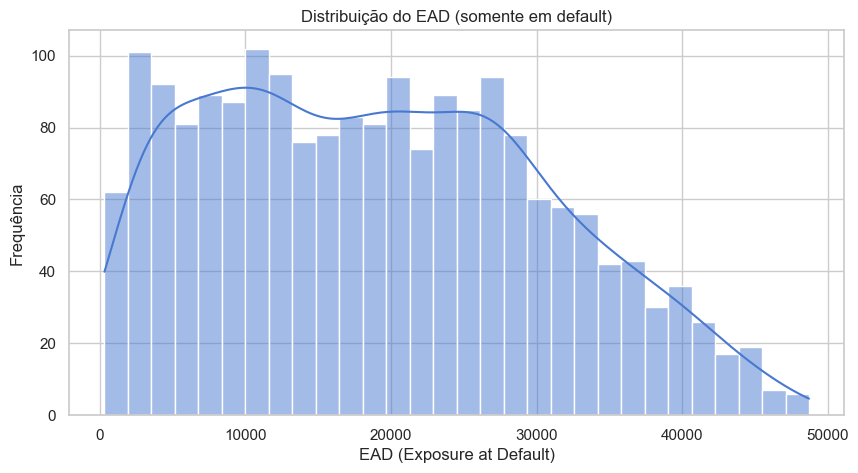

In [9]:
# EAD só é válido se houve default
ead_em_default = df[df['default'] == 1]['ead']

print(f"EAD médio em caso de default: {ead_em_default.mean():,.2f}")
print(f"EAD - valores mínimo e máximo: {ead_em_default.min():,.2f} a {ead_em_default.max():,.2f}")

# Distribuição
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(ead_em_default, bins=30, kde=True)
plt.title('Distribuição do EAD (somente em default)')
plt.xlabel('EAD (Exposure at Default)')
plt.ylabel('Frequência')
plt.show()


### Regra e Lógica sugerida para estimar EAD antes do evento:

Em pesquisas e pelo gráfico o que posso sugerir:

1. Considerar o valor contratado ainda em aberto (saldo devedor).
2. Pode-se ajustar com:
   - % do prazo restante (ex: 60% do prazo pode implicar 60% de exposição).
   - Tipo de produto (empréstimos rotativos tendem a ter EAD mais próximos do limite).
   - Histórico de uso do crédito (para cartão, cheque especial).
##### Regras
céditos parcelados
- EAD = saldo devedor atual + juros acumulados até a próxima parcela

créditos rotativos
- EAD = valor utilizado + fator de conversão × limite disponível

# LGD – Loss Given Default 

In [10]:
segmentos_lgd = ['produto', 'faixa_renda', 'profissao', 'possui_imovel']

for coluna in segmentos_lgd:
    print(f"\nLGD médio por {coluna}:")
    print(df.groupby(coluna, observed=True)['lgd'].mean().sort_values(ascending=False).round(2))



LGD médio por produto:
produto
Consignado           0.13
Financiamento Auto   0.13
Cheque Especial      0.13
Cartão de Crédito    0.13
Crédito Pessoal      0.12
Name: lgd, dtype: float64

LGD médio por faixa_renda:
faixa_renda
Alta          0.13
Baixa         0.13
Média-Alta    0.12
Média-Baixa   0.12
Name: lgd, dtype: float64

LGD médio por profissao:
profissao
Gerente      0.14
Autônomo     0.13
Vendedor     0.13
Analista     0.13
Estudante    0.13
Engenheiro   0.12
Aposentado   0.12
Professor    0.11
Name: lgd, dtype: float64

LGD médio por possui_imovel:
possui_imovel
Sim   0.13
Não   0.12
Name: lgd, dtype: float64


# Parte 3

In [11]:
# Verificando se há dados ausentes nas variáveis essenciais
print("Valores ausentes em variáveis-chave:")
print(df[['pd_score', 'pd_produto', 'pd_regiao', 'pd_renda', 'pd_profissao', 'ead', 'lgd']].isnull().sum())

# Criar nova base somente com registros válidos
df_pe = df.dropna(subset=['ead', 'lgd']).copy()


Valores ausentes em variáveis-chave:
pd_score        0
pd_produto      0
pd_regiao       0
pd_renda        0
pd_profissao    0
ead             0
lgd             0
dtype: int64


In [12]:
# Converter variáveis-chave para float (por segurança)
colunas_numericas = ['pd_score', 'pd_produto', 'pd_regiao', 'pd_renda', 'pd_profissao', 'ead', 'lgd']
df_pe[colunas_numericas] = df_pe[colunas_numericas].apply(pd.to_numeric, errors='coerce')


In [13]:
# PE usando PD por Score
df_pe['pe_score'] = df_pe['pd_score'] * df_pe['ead'] * df_pe['lgd']

# PE usando PD por Produto
df_pe['pe_produto'] = df_pe['pd_produto'] * df_pe['ead'] * df_pe['lgd']

# PE usando PD por Região
df_pe['pe_regiao'] = df_pe['pd_regiao'] * df_pe['ead'] * df_pe['lgd']

# PE usando PD por Faixa de Renda
df_pe['pe_renda'] = df_pe['pd_renda'] * df_pe['ead'] * df_pe['lgd']

# PE usando PD por Profissão
df_pe['pe_profissao'] = df_pe['pd_profissao'] * df_pe['ead'] * df_pe['lgd']



In [14]:
# Exibir estatísticas descritivas das diferentes estimativas de PE
pe_cols = ['pe_score', 'pe_produto', 'pe_regiao', 'pe_renda', 'pe_profissao']
print("Estatísticas da Perda Esperada por diferentes abordagens de PD:")
print(df_pe[pe_cols].describe().T.round(2))


Estatísticas da Perda Esperada por diferentes abordagens de PD:
                count   mean     std  min  25%  50%  75%     max
pe_score     10000.00 469.94 1210.94 0.00 0.00 0.00 0.00 8482.62
pe_produto   10000.00 469.97 1211.89 0.00 0.00 0.00 0.00 8725.10
pe_regiao    10000.00 469.78 1211.06 0.00 0.00 0.00 0.00 8312.72
pe_renda     10000.00 469.44 1209.47 0.00 0.00 0.00 0.00 8417.45
pe_profissao 10000.00 470.77 1215.59 0.00 0.00 0.00 0.00 8591.49


In [15]:
# Comparando PE média por produto
print("PE média por Produto (usando pd_score):")
print(df_pe.groupby('produto')['pe_score'].mean().sort_values(ascending=False).round(2))

# Comparando PE média por região
print("\nPE média por Região (usando pd_score):")
print(df_pe.groupby('regiao')['pe_score'].mean().sort_values(ascending=False).round(2))


PE média por Produto (usando pd_score):
produto
Cheque Especial      499.69
Consignado           487.33
Financiamento Auto   477.04
Cartão de Crédito    459.34
Crédito Pessoal      427.35
Name: pe_score, dtype: float64

PE média por Região (usando pd_score):
regiao
Sul            495.92
Norte          489.27
Nordeste       467.02
Centro-Oeste   464.26
Sudeste        433.43
Name: pe_score, dtype: float64


In [16]:
top_risco = df_pe[['id_operacao', 'id_cliente', 'produto', 'regiao', 'faixa_score', 'pd_score', 'ead', 'lgd', 'pe_score']]
top_risco = top_risco.sort_values(by='pe_score', ascending=False).head(10)

print("Top 10 operações com maior Perda Esperada (com base em PD por Score):")
print(top_risco)


Top 10 operações com maior Perda Esperada (com base em PD por Score):
     id_operacao id_cliente             produto    regiao faixa_score  \
7456     O007457     C00725     Cheque Especial   Sudeste       Baixo   
9556     O009557     C02837          Consignado     Norte       Baixo   
9328     O009329     C01547   Cartão de Crédito     Norte       Médio   
7491     O007492     C00860   Cartão de Crédito     Norte       Médio   
4282     O004283     C01369  Financiamento Auto       Sul       Baixo   
1509     O001510     C02293     Crédito Pessoal     Norte       Baixo   
9858     O009859     C02159     Crédito Pessoal   Sudeste       Baixo   
7704     O007705     C01604     Crédito Pessoal       Sul       Baixo   
2384     O002385     C01853          Consignado  Nordeste       Baixo   
546      O000547     C00203          Consignado       Sul       Baixo   

      pd_score      ead  lgd  pe_score  
7456      0.19 44043.86 0.99   8482.62  
9556      0.19 43139.85 0.96   8056.74  
932

In [17]:
# Selecionar colunas relevantes
colunas_pe = ['pe_score', 'pe_produto', 'pe_regiao', 'pe_renda', 'pe_profissao']

top10_pe = df_pe[
    ['id_operacao', 'id_cliente', 'produto', 'regiao', 'faixa_score', 'ead', 'lgd'] + colunas_pe
].sort_values(by='pe_score', ascending=False).head(10)

# Exibir o DataFrame
print("Top 10 operações com maior Perda Esperada (baseado em pd_score):")
display(top10_pe.style.format({'pe_score': '{:.2f}', 'ead': '{:.2f}', 'lgd': '{:.2f}'}))


Top 10 operações com maior Perda Esperada (baseado em pd_score):


,id_operacao,id_cliente,produto,regiao,faixa_score,ead,lgd,pe_score,pe_produto,pe_regiao,pe_renda,pe_profissao
7456,O007457,C00725,Cheque Especial,Sudeste,Baixo,44043.86,0.99,8482.62,8725.101508,8312.724184,8417.446531,8591.488420
9556,O009557,C02837,Consignado,Norte,Baixo,43139.85,0.96,8056.74,8180.341536,8103.254876,8206.588831,7507.669904
9328,O009329,C01547,Cartão de Crédito,Norte,Médio,46604.96,0.88,8004.93,8046.596190,8024.618323,8126.949493,8080.954547
7491,O007492,C00860,Cartão de Crédito,Norte,Médio,44183.82,0.92,7934.03,7975.326929,7953.543722,7918.447398,8562.969087
4282,O004283,C01369,Financiamento Auto,Sul,Baixo,45257.62,0.90,7923.98,7740.069396,8122.127096,7934.566573,8580.400282
1509,O001510,C02293,Crédito Pessoal,Norte,Baixo,48720.77,0.83,7866.86,7560.021807,7912.283730,7877.369473,7967.831317
9858,O009859,C02159,Crédito Pessoal,Sudeste,Baixo,45440.89,0.88,7779.27,7475.845082,7623.463722,7613.712125,7887.686386
7704,O007705,C01604,Crédito Pessoal,Sul,Baixo,43809.95,0.91,7755.74,7453.237469,7949.680943,7590.687590,7867.569591
2384,O002385,C01853,Consignado,Nordeste,Baixo,42027.12,0.94,7685.40,7803.312343,7595.759970,7828.349910,7161.643921
546,O000547,C00203,Consignado,Sul,Baixo,39390.48,0.98,7509.77,7624.983589,7697.556980,7519.800858,8131.874729


# Parte 4


 Matriz de Confusão – Regressão Logística
                           Previsto Não Default (0)  Previsto Default (1)
Realmente Não Default (0)                      1165                  1253
Realmente Default (1)                           282                   300

 Relatório de Classificação – Regressão Logística
              precision    recall  f1-score   support

           0       0.81      0.48      0.60      2418
           1       0.19      0.52      0.28       582

    accuracy                           0.49      3000
   macro avg       0.50      0.50      0.44      3000
weighted avg       0.69      0.49      0.54      3000

 AUC – Regressão Logística: 0.4998

 Interpretação:
 AUC: quanto mais próximo de 1, melhor o poder de separação do modelo.
 Precisão: entre os que o modelo previu como default, quantos realmente deram default?
 Recall: entre os que deram default, quantos o modelo acertou?
 Matriz de Confusão: mostra erros e acertos (TP, TN, FP, FN)



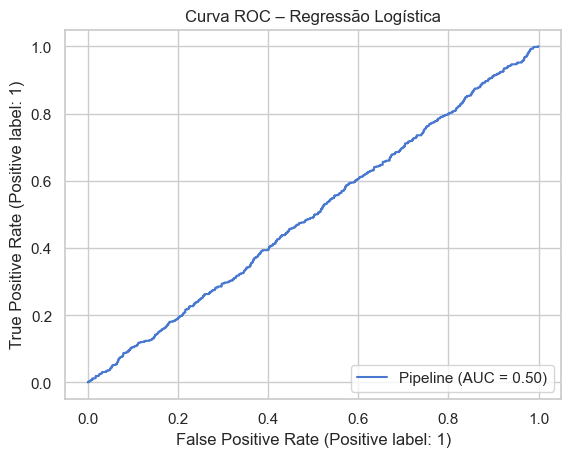


 Matriz de Confusão – Árvore de Decisão
                           Previsto Não Default (0)  Previsto Default (1)
Realmente Não Default (0)                      1421                   997
Realmente Default (1)                           349                   233

 Relatório de Classificação – Árvore de Decisão
              precision    recall  f1-score   support

           0       0.80      0.59      0.68      2418
           1       0.19      0.40      0.26       582

    accuracy                           0.55      3000
   macro avg       0.50      0.49      0.47      3000
weighted avg       0.68      0.55      0.60      3000

 AUC – Árvore de Decisão: 0.4871

 Interpretação:
 AUC: quanto mais próximo de 1, melhor o poder de separação do modelo.
 Precisão: entre os que o modelo previu como default, quantos realmente deram default?
 Recall: entre os que deram default, quantos o modelo acertou?
 Matriz de Confusão: mostra erros e acertos (TP, TN, FP, FN)



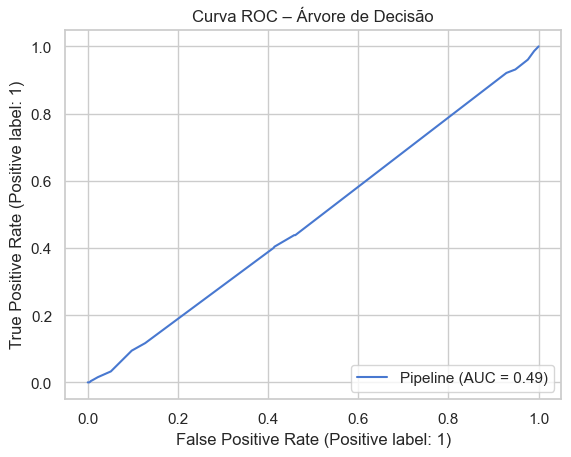

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o df novamente pois não lembro se alterei o nome dele nas outras partes
df = pd.read_csv('base_credito_simulada_10000_enriquecida.csv')


# Definição das variáveis preditoras
variaveis_numericas = ['score_credito', 'renda_cliente', 'idade_cliente', 'tempo_emprego', 'numero_dependentes']
variaveis_categoricas = ['produto', 'regiao', 'profissao', 'possui_imovel', 'possui_veiculo']

X = df[variaveis_numericas + variaveis_categoricas]
y = df['default']


# Divisão treino/teste (30% dos dados para teste e 70% para treinamento)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


# Pré-processador com OneHotEncoder para variáveis categóricas
preprocessador = ColumnTransformer([
    ('num', 'passthrough', variaveis_numericas),
    ('cat', OneHotEncoder(drop='first'), variaveis_categoricas)
])


# Dicionário de modelos
modelos = {
    'Regressão Logística': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Árvore de Decisão': DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
}


# Avaliação dos modelos
for nome, modelo in modelos.items():
    pipeline = Pipeline([
        ('preprocessador', preprocessador),
        ('classificador', modelo)
    ])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    matriz = confusion_matrix(y_test, y_pred)
    matriz_df = pd.DataFrame(
        matriz,
        index=["Realmente Não Default (0)", "Realmente Default (1)"],
        columns=["Previsto Não Default (0)", "Previsto Default (1)"]
    )

    print(f"\n Matriz de Confusão – {nome}")
    print(matriz_df)

    print(f"\n Relatório de Classificação – {nome}")
    print(classification_report(y_test, y_pred))

    auc = roc_auc_score(y_test, y_proba)
    print(f" AUC – {nome}: {auc:.4f}")

    print("""
 Interpretação:
 AUC: quanto mais próximo de 1, melhor o poder de separação do modelo.
 Precisão: entre os que o modelo previu como default, quantos realmente deram default?
 Recall: entre os que deram default, quantos o modelo acertou?
 Matriz de Confusão: mostra erros e acertos (TP, TN, FP, FN)
""")

    RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
    plt.title(f"Curva ROC – {nome}")
    plt.show()



## Justificativa das variáveis escolhidas:


#### VARIÁVEIS NUMÉRICAS:
- **score_credito**      → Reflete risco de crédito do cliente (diretamente ligado à chance de inadimplência)
- **renda_cliente**       → Capacidade de pagamento
- **idade_cliente**       → Clientes mais jovens ou muito idosos podem ter padrões de risco diferentes
- **tempo_emprego**      → Estabilidade financeira
- **numero_dependentes**  → Pressão sobre a renda

#### VARIÁVEIS CATEGÓRICAS:
- **produto**             → Produtos mais arriscados (ex: cheque especial)
- **regiao**           → Diferenças socioeconômicas por região
- **profissao**           → Alguns empregos têm maior estabilidade
- **possui_imovel**       → Pode ser indicativo de patrimônio (menor risco)
- **possui_veiculo**      → Pode ajudar como proxy de renda ou estabilidade


# Avalie o desempenho com métricas básicas: AUC, Precisão, Recall, Matriz de Confusão. 
- **AUC**: mede a capacidade do modelo em distinguir entre classes.
- **Precisão**: entre as previsões de "default", quantas estavam corretas?
- **Recall**: entre os casos que realmente deram default, quantos foram capturados pelo modelo?
- **Matriz de Confusão**: mostra os acertos e erros do modelo.



## Regressão Logística

|                            | Previsto Não Default (0) | Previsto Default (1) |
|----------------------------|--------------------------|------------------------|
| **Realmente Não Default (0)** | 1165                      | 1253                    |
| **Realmente Default (1)**     | 282                       | 300                     |

- **AUC**: `0.4998`
- **Precisão (classe 1)**: `0.19`
- **Recall (classe 1)**: `0.52`
- **F1-score (classe 1)**: `0.28`
- **Acurácia geral**: `0.49`

*O modelo acerta moderadamente os "não inadimplentes", mas tem baixa precisão para prever inadimplência. O AUC próximo de 0.5 indica fraca capacidade de discriminação entre as classes.*

---

## Árvore de Decisão

|                            | Previsto Não Default (0) | Previsto Default (1) |
|----------------------------|--------------------------|------------------------|
| **Realmente Não Default (0)** | 1421                      | 997                     |
| **Realmente Default (1)**     | 349                       | 233                     |

- **AUC**: `0.4871`
- **Precisão (classe 1)**: `0.19`
- **Recall (classe 1)**: `0.40`
- **F1-score (classe 1)**: `0.26`
- **Acurácia geral**: `0.55`

*A árvore de decisão captura menos inadimplentes que a regressão, mas melhora um pouco a acurácia geral. Ainda assim, o AUC mostra que o modelo não diferencia bem os perfis.*


# Extras

# - Na parte 04, utilizei regressão linear e random forest para responder a uma pergunta feita durante a entrevista: `Qual método você utilizaria para responder se uma pessoa falasse que pessoas mais velhas ou mais jovens tendem a ser mais inadiplentes?` Fiz alguns testes com várias possibilidades, como regressão logística, árvore de decisão, regressão linear e random forest.

In [19]:
!pip install --upgrade seaborn


# Regressão para idade

Matriz de Confusão – Modelo com Idade:
[[2418    0]
 [ 582    0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2418
           1       0.00      0.00      0.00       582

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000

AUC: 0.4959


D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


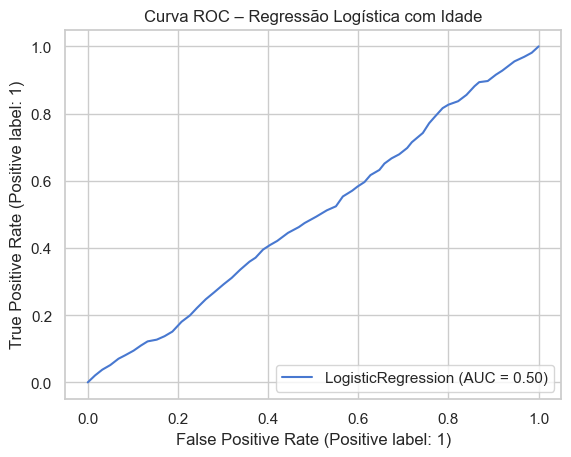

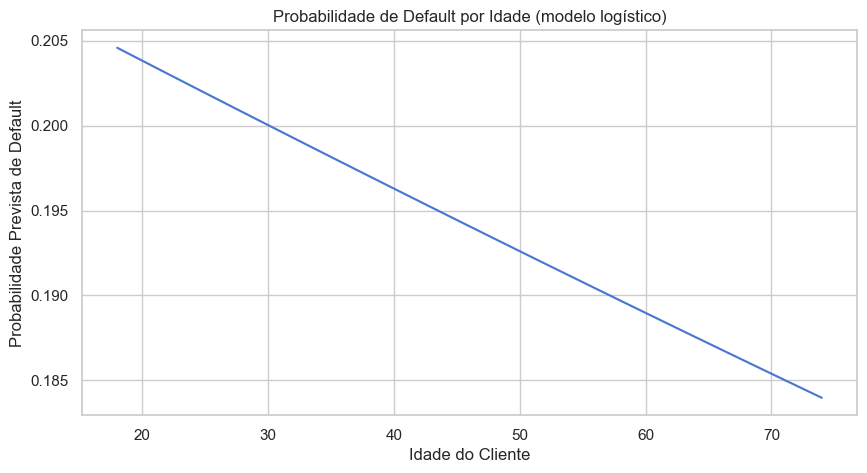

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# 1. Definir X e y com apenas a variável idade
X_idade = df[['idade_cliente']]
y = df['default']

# 2. Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_idade, y, test_size=0.3, stratify=y, random_state=42)

# 3. Treinar modelo
modelo_idade = LogisticRegression()
modelo_idade.fit(X_train, y_train)

# 4. Fazer previsões
y_pred = modelo_idade.predict(X_test)
y_proba = modelo_idade.predict_proba(X_test)[:, 1]

# 5. Avaliar desempenho
print("Matriz de Confusão – Modelo com Idade:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

# 6. Visualizar Curva ROC
RocCurveDisplay.from_estimator(modelo_idade, X_test, y_test)
plt.title("Curva ROC – Regressão Logística com Idade")
plt.show()

# 7. Visualizar relação da idade com probabilidade prevista
df_pred = pd.DataFrame({
    'idade_cliente': X_test['idade_cliente'],
    'prob_default': y_proba
})
plt.figure(figsize=(10, 5))
sns.lineplot(x='idade_cliente', y='prob_default', data=df_pred.sort_values('idade_cliente'))
plt.title("Probabilidade de Default por Idade (modelo logístico)")
plt.xlabel("Idade do Cliente")
plt.ylabel("Probabilidade Prevista de Default")
plt.grid(True)
plt.show()


Matriz de Confusão – Árvore com Idade:
[[1969  449]
 [ 491   91]]

 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2418
           1       0.17      0.16      0.16       582

    accuracy                           0.69      3000
   macro avg       0.48      0.49      0.48      3000
weighted avg       0.68      0.69      0.68      3000

AUC: 0.4877


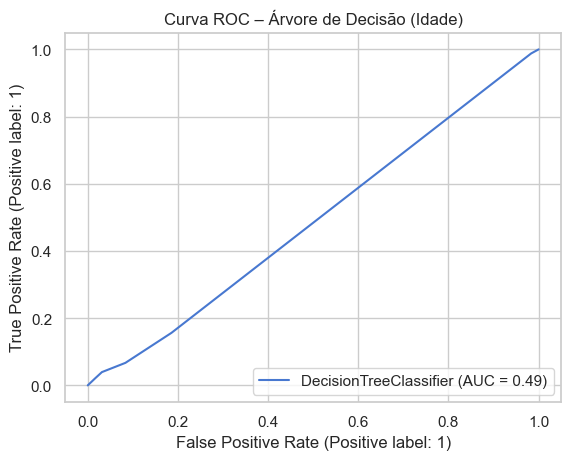

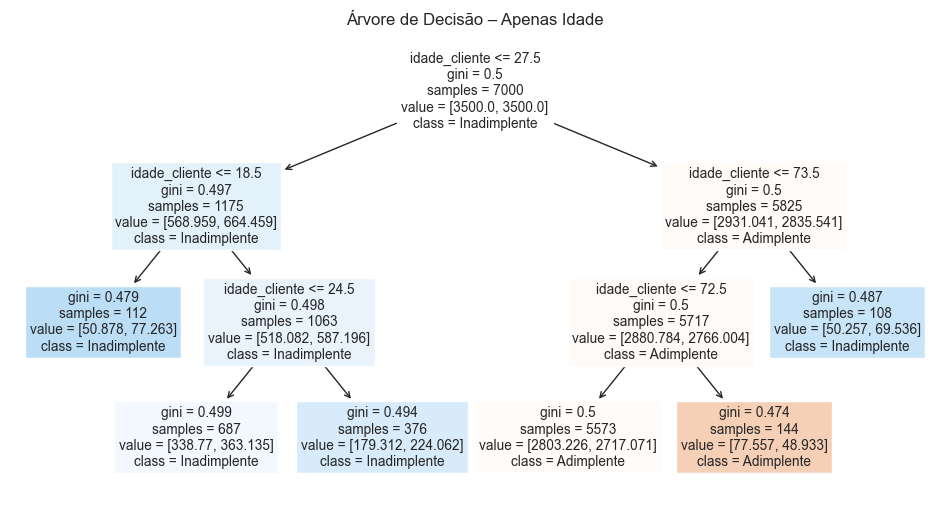

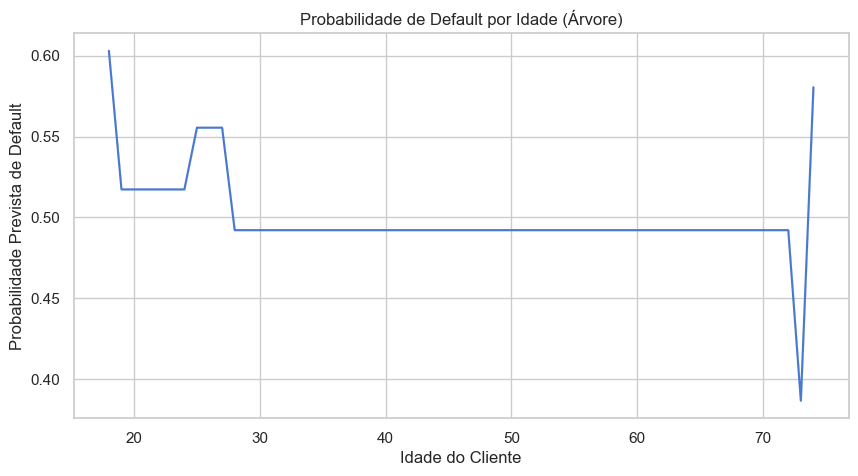

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dados de entrada
X_idade = df[['idade_cliente']]
y = df['default']

# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_idade, y, test_size=0.3, stratify=y, random_state=42)

# 3. Criar e treinar modelo
arvore_idade = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=42)
arvore_idade.fit(X_train, y_train)

# 4. Previsões
y_pred_tree = arvore_idade.predict(X_test)
y_proba_tree = arvore_idade.predict_proba(X_test)[:, 1]

# 5. Avaliação
print("Matriz de Confusão – Árvore com Idade:")
print(confusion_matrix(y_test, y_pred_tree))
print("\n Relatório de Classificação:")
print(classification_report(y_test, y_pred_tree))
print(f"AUC: {roc_auc_score(y_test, y_proba_tree):.4f}")

# 6. Curva ROC
RocCurveDisplay.from_estimator(arvore_idade, X_test, y_test)
plt.title("Curva ROC – Árvore de Decisão (Idade)")
plt.show()

# 7. Visualização da árvore
plt.figure(figsize=(12, 6))
plot_tree(arvore_idade, feature_names=['idade_cliente'], class_names=['Adimplente', 'Inadimplente'], filled=True)
plt.title("Árvore de Decisão – Apenas Idade")
plt.show()

# 8. Análise gráfica de probabilidade
df_pred_tree = pd.DataFrame({
    'idade_cliente': X_test['idade_cliente'],
    'prob_default': y_proba_tree
})
plt.figure(figsize=(10, 5))
sns.lineplot(x='idade_cliente', y='prob_default', data=df_pred_tree.sort_values('idade_cliente'))
plt.title("Probabilidade de Default por Idade (Árvore)")
plt.xlabel("Idade do Cliente")
plt.ylabel("Probabilidade Prevista de Default")
plt.grid(True)
plt.show()


Matriz de Confusão – Regressão com Score:
[[2418    0]
 [ 582    0]]

 Relatório:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2418
           1       0.00      0.00      0.00       582

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000

AUC: 0.4840


D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


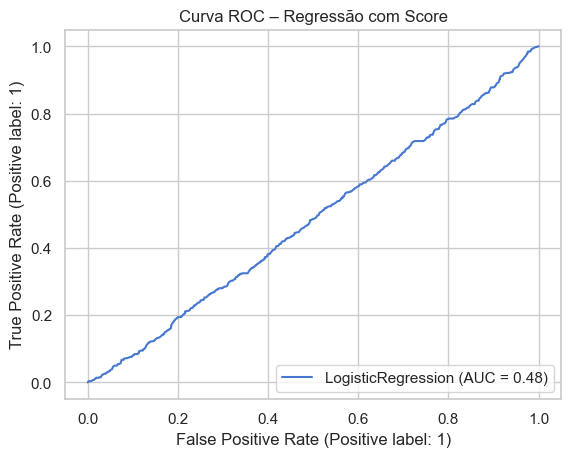

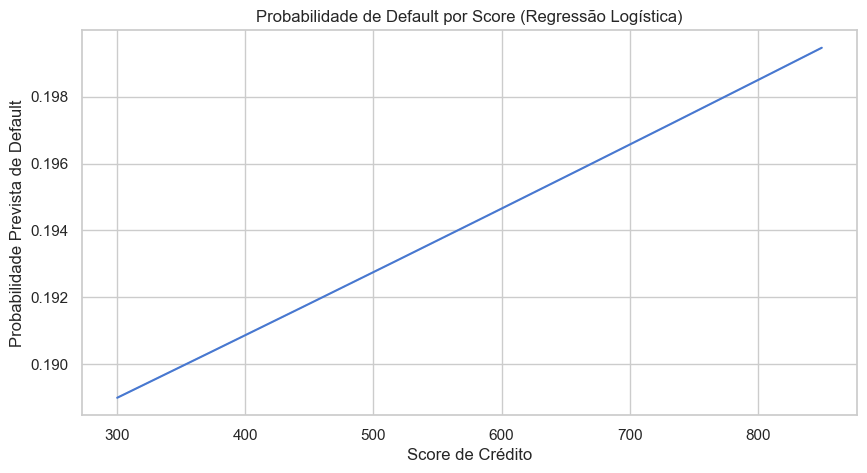

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Dados
X_score = df[['score_credito']]
y = df['default']

# Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X_score, y, test_size=0.3, stratify=y, random_state=42)

# Modelo
modelo_score = LogisticRegression()
modelo_score.fit(X_train, y_train)

# Avaliação
y_pred = modelo_score.predict(X_test)
y_proba = modelo_score.predict_proba(X_test)[:, 1]

print("Matriz de Confusão – Regressão com Score:")
print(confusion_matrix(y_test, y_pred))
print("\n Relatório:")
print(classification_report(y_test, y_pred))
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

# Curva ROC
RocCurveDisplay.from_estimator(modelo_score, X_test, y_test)
plt.title("Curva ROC – Regressão com Score")
plt.show()

# Visualização da curva de probabilidade
df_pred_score = pd.DataFrame({
    'score_credito': X_test['score_credito'],
    'prob_default': y_proba
})
plt.figure(figsize=(10, 5))
sns.lineplot(x='score_credito', y='prob_default', data=df_pred_score.sort_values('score_credito'))
plt.title("Probabilidade de Default por Score (Regressão Logística)")
plt.xlabel("Score de Crédito")
plt.ylabel("Probabilidade Prevista de Default")
plt.grid(True)
plt.show()


Matriz de Confusão – Árvore com Score:
[[2395   23]
 [ 579    3]]

Relatório:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2418
           1       0.12      0.01      0.01       582

    accuracy                           0.80      3000
   macro avg       0.46      0.50      0.45      3000
weighted avg       0.67      0.80      0.72      3000

AUC: 0.4990


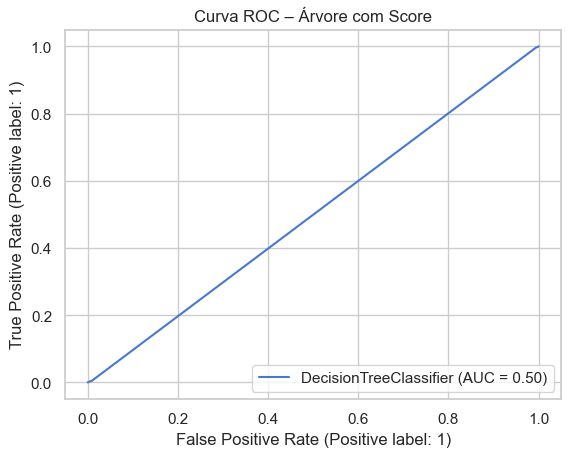

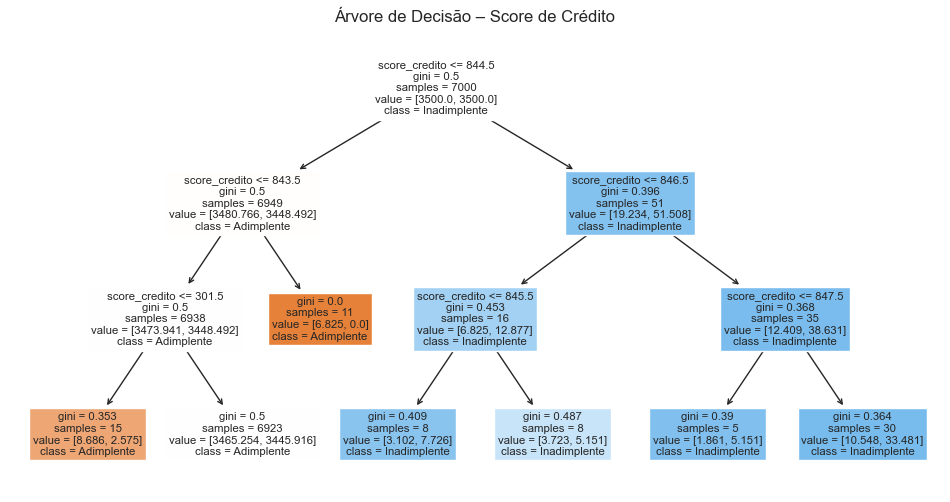

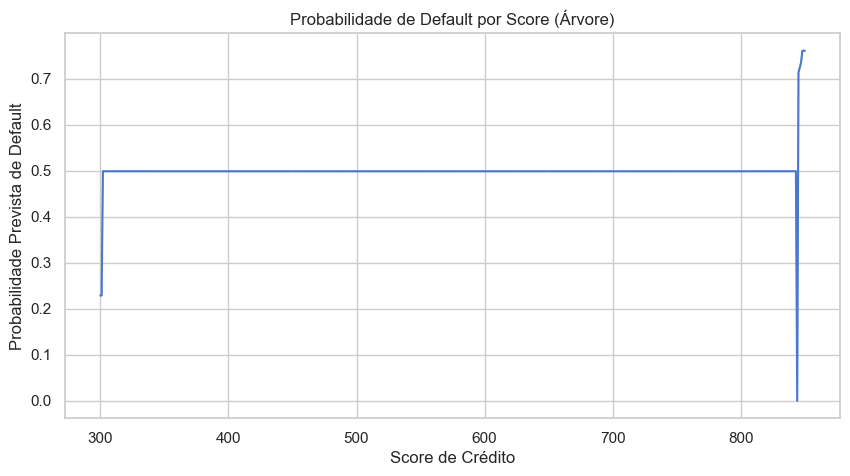

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Dados
X_score = df[['score_credito']]
y = df['default']

# Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X_score, y, test_size=0.3, stratify=y, random_state=42)

# Modelo
arvore_score = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=42)
arvore_score.fit(X_train, y_train)

# Avaliação
y_pred_tree = arvore_score.predict(X_test)
y_proba_tree = arvore_score.predict_proba(X_test)[:, 1]

print("Matriz de Confusão – Árvore com Score:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nRelatório:")
print(classification_report(y_test, y_pred_tree))
print(f"AUC: {roc_auc_score(y_test, y_proba_tree):.4f}")

# Curva ROC
RocCurveDisplay.from_estimator(arvore_score, X_test, y_test)
plt.title("Curva ROC – Árvore com Score")
plt.show()

# Visualização da árvore
plt.figure(figsize=(12, 6))
plot_tree(arvore_score, feature_names=['score_credito'], class_names=['Adimplente', 'Inadimplente'], filled=True)
plt.title("Árvore de Decisão – Score de Crédito")
plt.show()

# Curva de risco
df_pred_tree_score = pd.DataFrame({
    'score_credito': X_test['score_credito'],
    'prob_default': y_proba_tree
})
plt.figure(figsize=(10, 5))
sns.lineplot(x='score_credito', y='prob_default', data=df_pred_tree_score.sort_values('score_credito'))
plt.title("Probabilidade de Default por Score (Árvore)")
plt.xlabel("Score de Crédito")
plt.ylabel("Probabilidade Prevista de Default")
plt.grid(True)
plt.show()


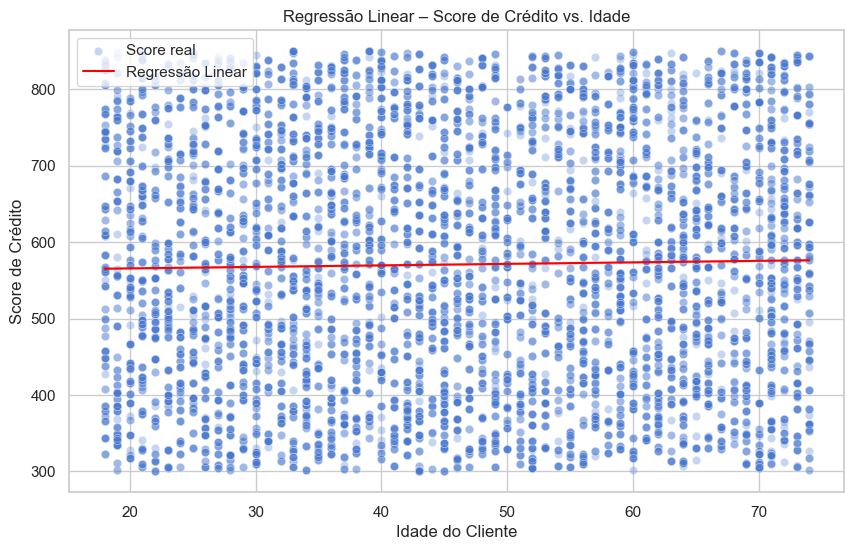

Coeficiente: 0.20
Intercepto: 561.75
R²: 0.0004


In [28]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Dados
X = df[['idade_cliente']]
y = df['score_credito']

# Modelo
modelo_linear = LinearRegression()
modelo_linear.fit(X, y)

# Previsões
df['score_previsto'] = modelo_linear.predict(X)

# Visualização
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade_cliente', y='score_credito', data=df, alpha=0.3, label="Score real")
sns.lineplot(x='idade_cliente', y='score_previsto', data=df, color='red', label="Regressão Linear")
plt.title("Regressão Linear – Score de Crédito vs. Idade")
plt.xlabel("Idade do Cliente")
plt.ylabel("Score de Crédito")
plt.grid(True)
plt.legend()
plt.show()

# Avaliação
print(f"Coeficiente: {modelo_linear.coef_[0]:.2f}")
print(f"Intercepto: {modelo_linear.intercept_:.2f}")
print(f"R²: {modelo_linear.score(X, y):.4f}")


Taxa de Inadimplência por Score e Idade (%):
faixa_idade  Jovem  Adulto Jovem  Meia-idade  Idoso
faixa_score                                        
Muito Baixo  19.20         18.60       22.30  18.60
Baixo        19.70         16.80       20.10  19.10
Médio        21.40         19.90       20.00  18.70
Alto         19.00         19.60       18.90  18.60


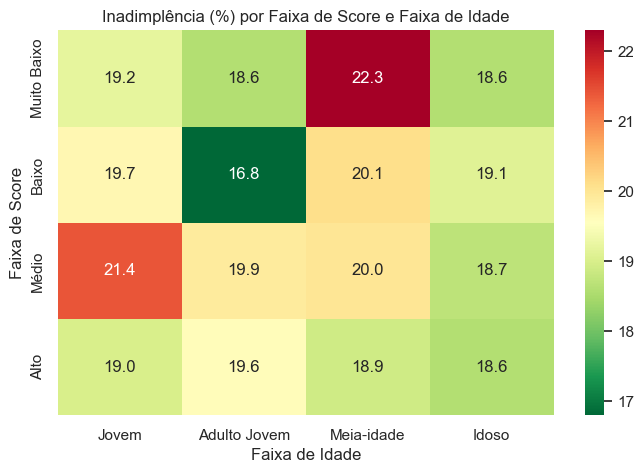

In [36]:
# Criar faixas de score e idade
df['faixa_score'] = pd.qcut(df['score_credito'], 4, labels=["Muito Baixo", "Baixo", "Médio", "Alto"])
df['faixa_idade'] = pd.qcut(df['idade_cliente'], 4, labels=["Jovem", "Adulto Jovem", "Meia-idade", "Idoso"])

# Tabela de inadimplência por faixa
tabela_default = df.groupby(['faixa_score', 'faixa_idade'], observed=True)['default'].mean().unstack() * 100
tabela_default = tabela_default.round(1)

print("Taxa de Inadimplência por Score e Idade (%):")
print(tabela_default)

# Visualização em heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(tabela_default, annot=True, fmt=".1f", cmap="RdYlGn_r")
plt.title("Inadimplência (%) por Faixa de Score e Faixa de Idade")
plt.xlabel("Faixa de Idade")
plt.ylabel("Faixa de Score")
plt.show()


# random frorest

 Matriz de Confusão – Random Forest (Idade)
[[1507  911]
 [ 378  204]]

 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70      2418
           1       0.18      0.35      0.24       582

    accuracy                           0.57      3000
   macro avg       0.49      0.49      0.47      3000
weighted avg       0.68      0.57      0.61      3000

 AUC: 0.4897


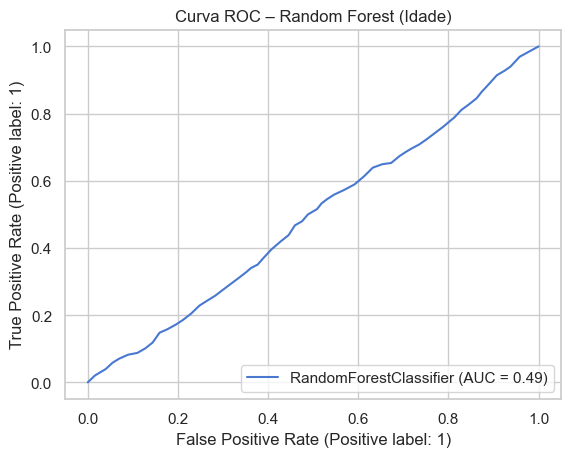

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Dados: apenas idade
X = df[['idade_cliente']]
y = df['default']

#  Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42)
modelo_rf.fit(X_train, y_train)

# Previsões
y_pred = modelo_rf.predict(X_test)
y_proba = modelo_rf.predict_proba(X_test)[:, 1]

#  Avaliação
print(" Matriz de Confusão – Random Forest (Idade)")
print(confusion_matrix(y_test, y_pred))
print("\n Relatório de Classificação:")
print(classification_report(y_test, y_pred))
print(f" AUC: {roc_auc_score(y_test, y_proba):.4f}")

# Curva ROC
RocCurveDisplay.from_estimator(modelo_rf, X_test, y_test)
plt.title("Curva ROC – Random Forest (Idade)")
plt.show()


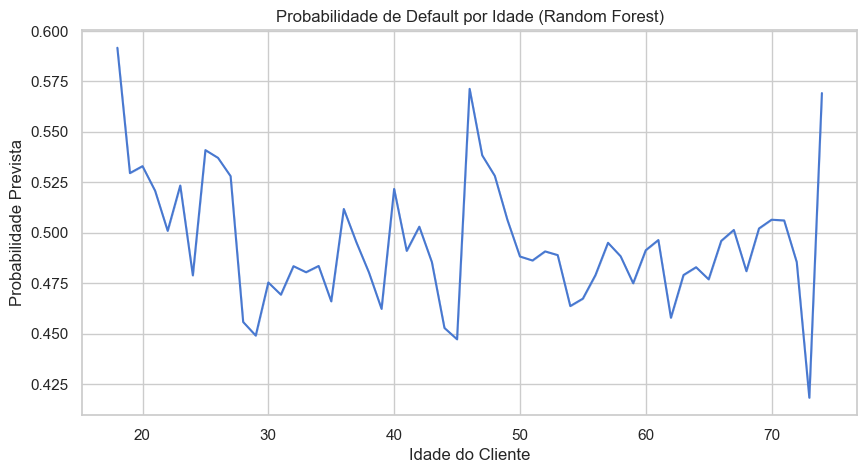

In [38]:
# Adicionar a previsão de probabilidade no DataFrame
df['prob_default_rf_idade'] = modelo_rf.predict_proba(df[['idade_cliente']])[:, 1]

# Curva de risco por idade
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.sort_values('idade_cliente'), x='idade_cliente', y='prob_default_rf_idade')
plt.title("Probabilidade de Default por Idade (Random Forest)")
plt.xlabel("Idade do Cliente")
plt.ylabel("Probabilidade Prevista")
plt.grid(True)
plt.show()


 Matriz de Confusão – Random Forest (Score de Crédito)
[[1516  902]
 [ 360  222]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.63      0.71      2418
           1       0.20      0.38      0.26       582

    accuracy                           0.58      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.69      0.58      0.62      3000

AUC: 0.5001


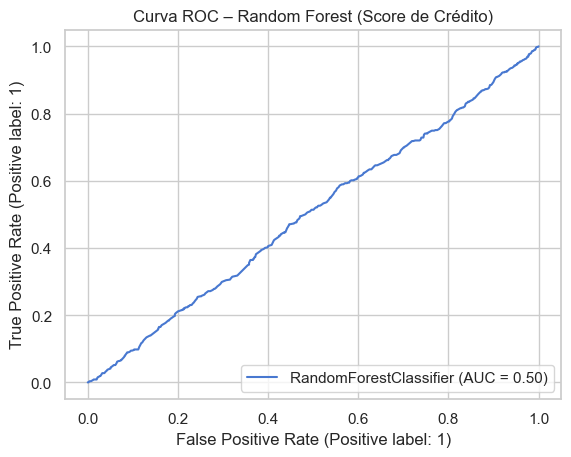

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Dados: apenas score_credito
X = df[['score_credito']]
y = df['default']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Modelo Random Forest
modelo_rf_score = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42)
modelo_rf_score.fit(X_train, y_train)

# Previsões
y_pred_score = modelo_rf_score.predict(X_test)
y_proba_score = modelo_rf_score.predict_proba(X_test)[:, 1]

# Avaliação
print(" Matriz de Confusão – Random Forest (Score de Crédito)")
print(confusion_matrix(y_test, y_pred_score))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_score))
print(f"AUC: {roc_auc_score(y_test, y_proba_score):.4f}")

# Curva ROC
RocCurveDisplay.from_estimator(modelo_rf_score, X_test, y_test)
plt.title("Curva ROC – Random Forest (Score de Crédito)")
plt.show()


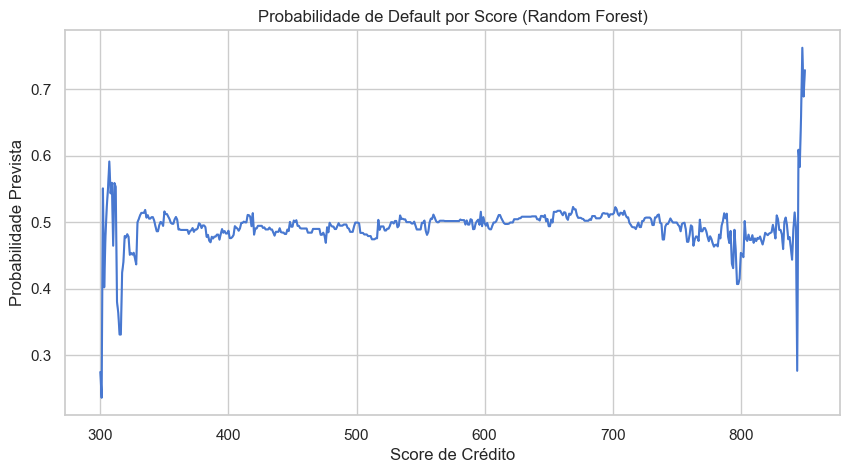

In [40]:
# Adicionar a previsão ao DataFrame
df['prob_default_rf_score'] = modelo_rf_score.predict_proba(df[['score_credito']])[:, 1]

# Curva de risco por score
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.sort_values('score_credito'), x='score_credito', y='prob_default_rf_score')
plt.title("Probabilidade de Default por Score (Random Forest)")
plt.xlabel("Score de Crédito")
plt.ylabel("Probabilidade Prevista")
plt.grid(True)
plt.show()


# Parte 5 Conclusões e Recomendações 

### Quais perfis de clientes são mais arriscados? 

Perfis mais arriscados com base na PE e gráficos:

- Score de crédito baixo ou médio
- Clientes com LGD > 0.9


Há produtos/regiões que concentram mais inadimplência? 
- Produtos: Cheque Especial, Cartão, Crédito Pessoal
- Regiões com mais PE: Norte e Sudeste

### Que recomendações você daria para política de crédito?

    1. Ajustar limites e taxas para produtos mais arriscados.
    
    2. Personalizar políticas por região.
    
    3. Exigir garantias reais em operações de alto risco.
    
    4. Criar alertas para operações com:
        - EAD alto + LGD alto
        - Score baixo ou médio
        - Produtos rotativos

Reavaliar limites e garantias para clientes com perfis semelhantes aos inadimplentes

### Oportunidades de Melhoria na Base de Dados

- Se o cliente já deu default antes(seria bom para ter um historico de default)
- Quantidade total de parcelas pagas em atraso
- Tempo como cliente da instituição